In [1]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = os.getcwd()
file_path = os.path.join(path,"file")
main_df = pd.read_csv(os.path.join(file_path,"marketing_campaign.csv"), sep='\t')

In [2]:
main_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
main_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
main_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
main_df["Marital_Status"].unique()
# Single : 혼자 살음
# Together : 둘이 살음
# Married : 결혼함
# Divorced : 이혼함
# Widow : 과부
# Alone : 모쏠?
# Absurd : 터무니없는
# YOLO : YOLO

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [6]:
#고객의 결혼 상태에 따라 지난 2년간 육류, 생선에 지출한 금액이 차이가 있을 것이다.

#처음에는 지출 평균을 그래프로 그려볼 것!
Marital_Status_df = pd.DataFrame()

Marital_Status_df["M_Wines"] = main_df["MntWines"].groupby(main_df["Marital_Status"]).mean()
Marital_Status_df["M_Fruits"]  = main_df["MntFruits"].groupby(main_df["Marital_Status"]).mean()
Marital_Status_df["M_Meat"]  = main_df["MntMeatProducts"].groupby(main_df["Marital_Status"]).mean()
Marital_Status_df["M_Fish"]  = main_df["MntFishProducts"].groupby(main_df["Marital_Status"]).mean()
Marital_Status_df["M_Sweet"]  = main_df["MntSweetProducts"].groupby(main_df["Marital_Status"]).mean()
Marital_Status_df["M_Gold"]  = main_df["MntGoldProds"].groupby(main_df["Marital_Status"]).mean()
Marital_Status_df["NumWebPurchases"]  = main_df["NumWebPurchases"].groupby(main_df["Marital_Status"]).mean()

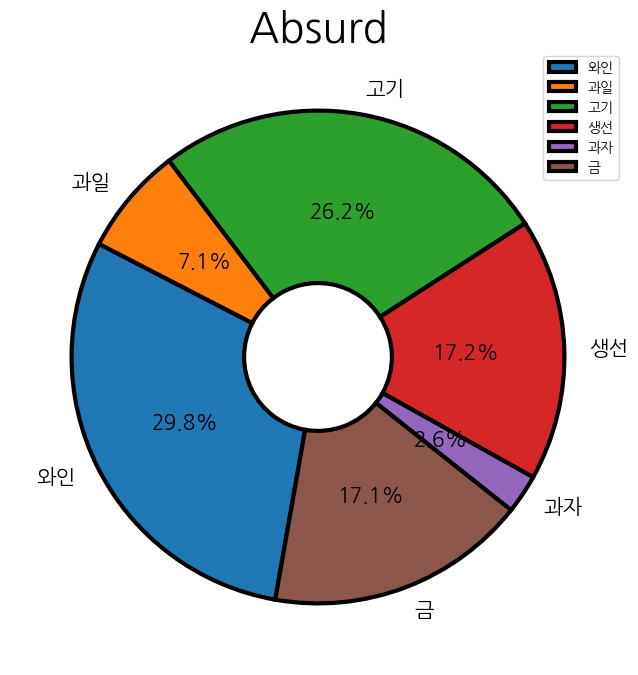

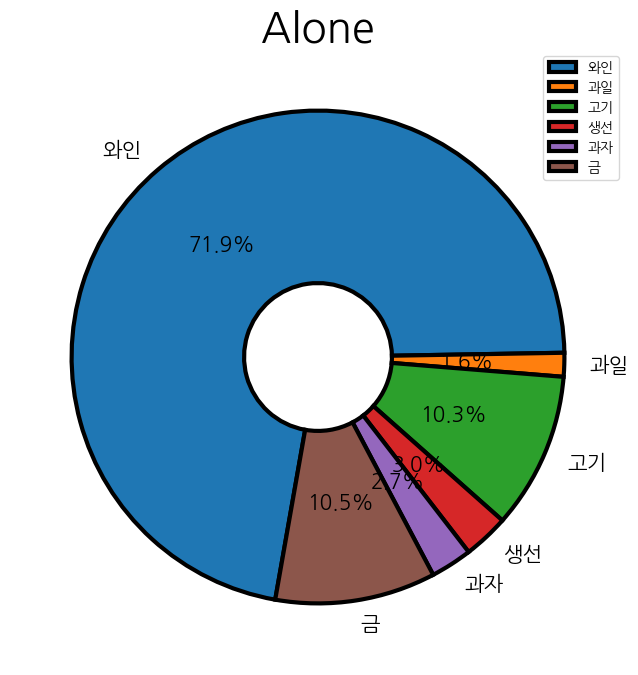

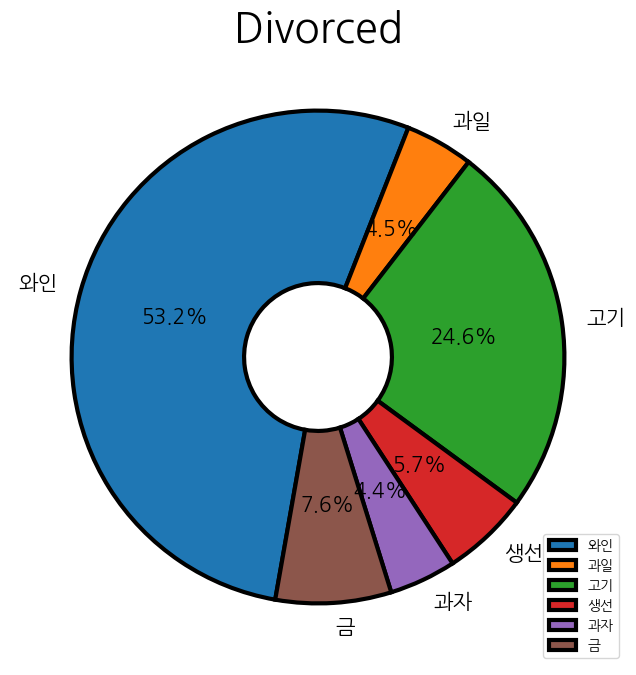

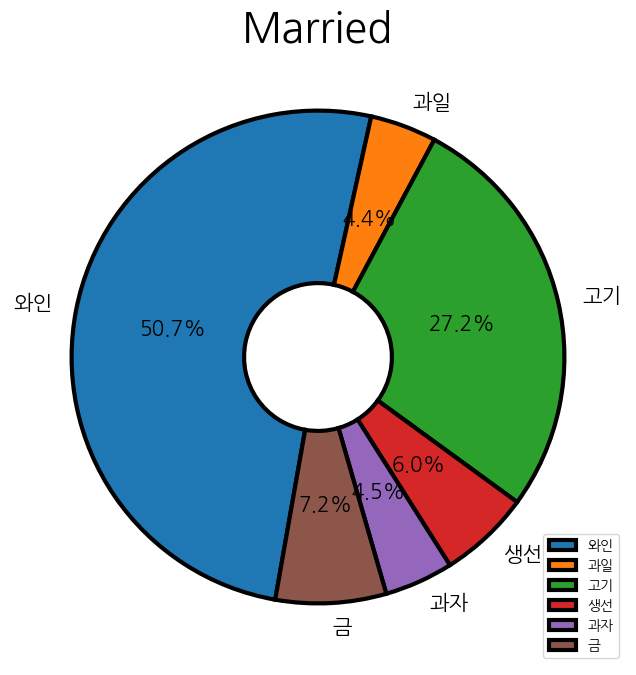

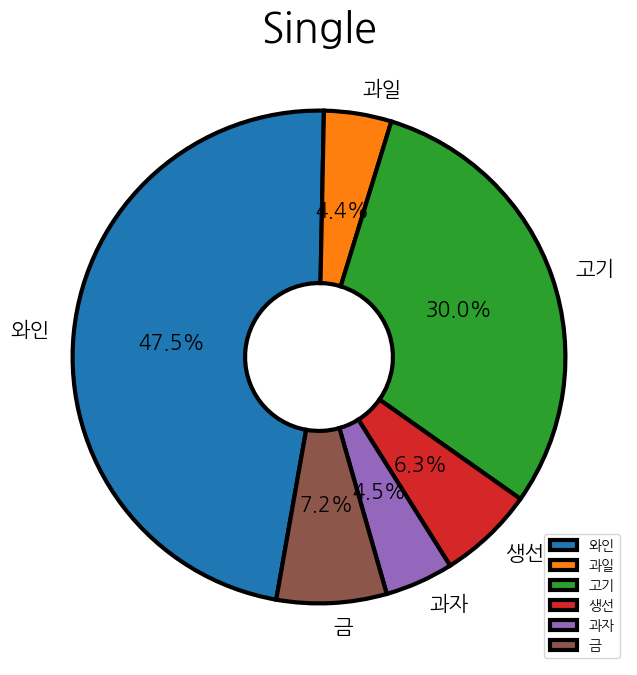

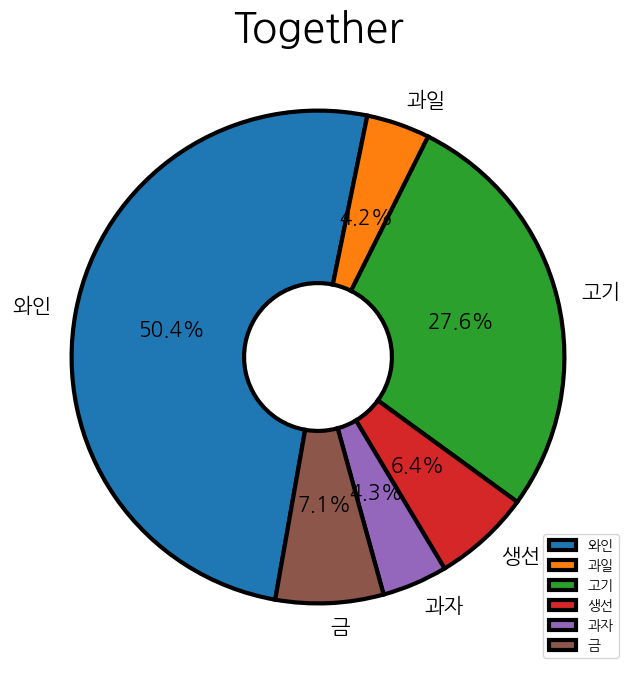

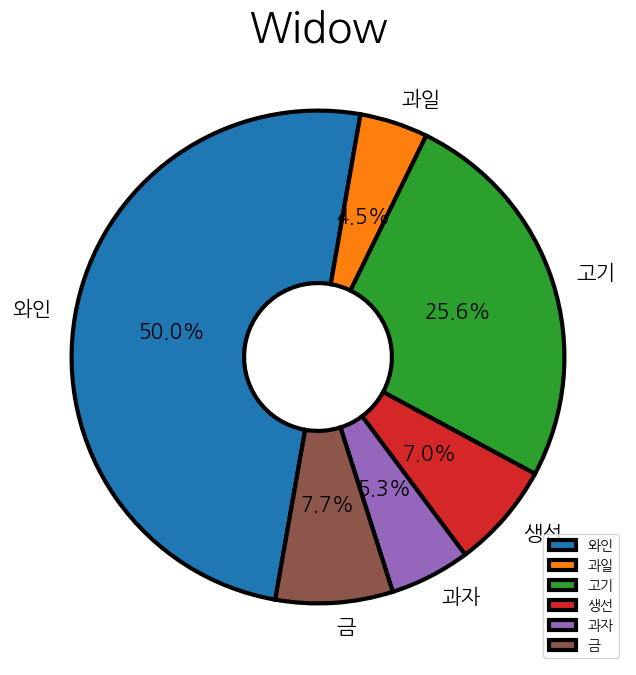

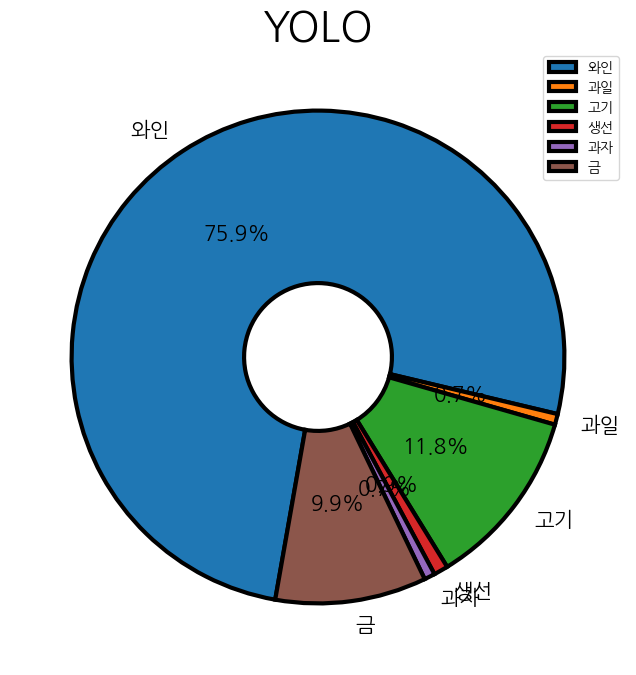

In [7]:
# 각 결혼 상태에 따른 지출 평균 차트 그림
Label = ["와인","과일","고기","생선","과자","금"]
plt.rcParams['font.family'] = "NanumGothic"
for i in Marital_Status_df.index:
    plt.figure(figsize=(8,8))
    plt.pie(Marital_Status_df.loc[i,:"M_Gold"],labels=Label, autopct='%.1f%%', startangle=260, counterclock=False
       , wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 3},textprops={'size':15})
    plt.title(i,size=30)
    plt.legend()
    plt.show()

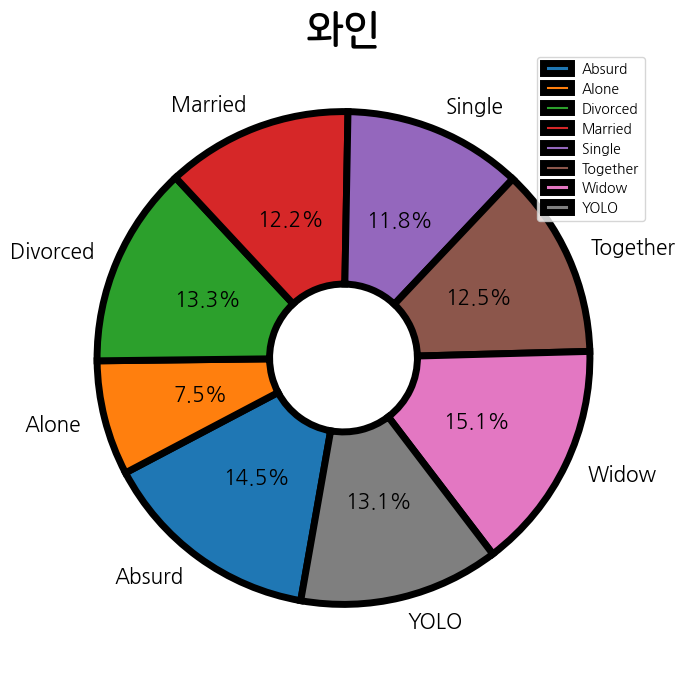

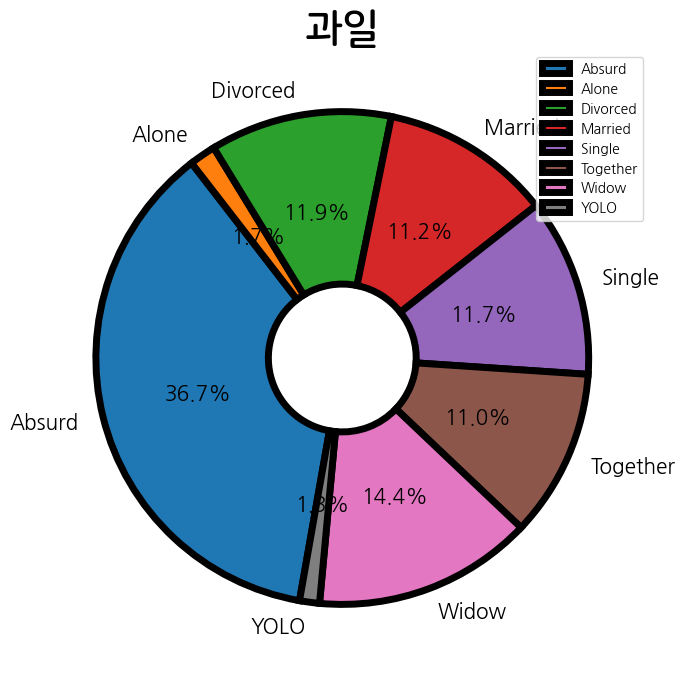

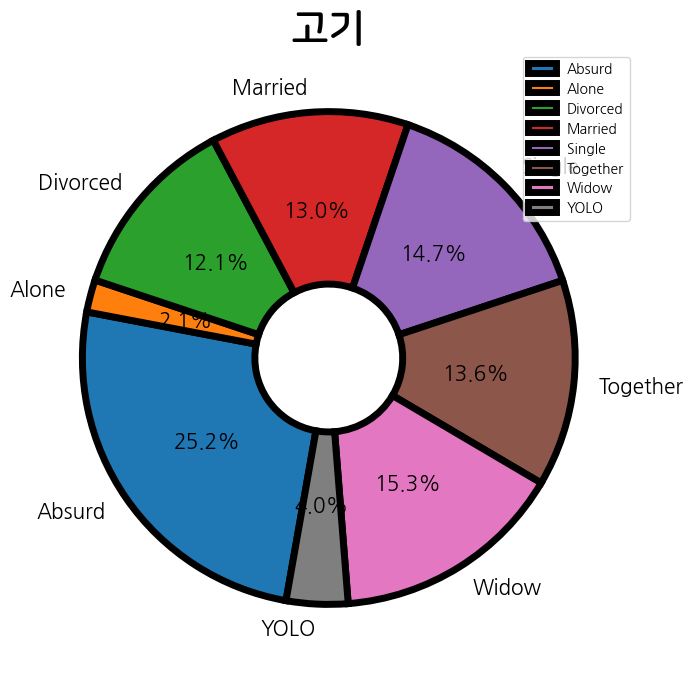

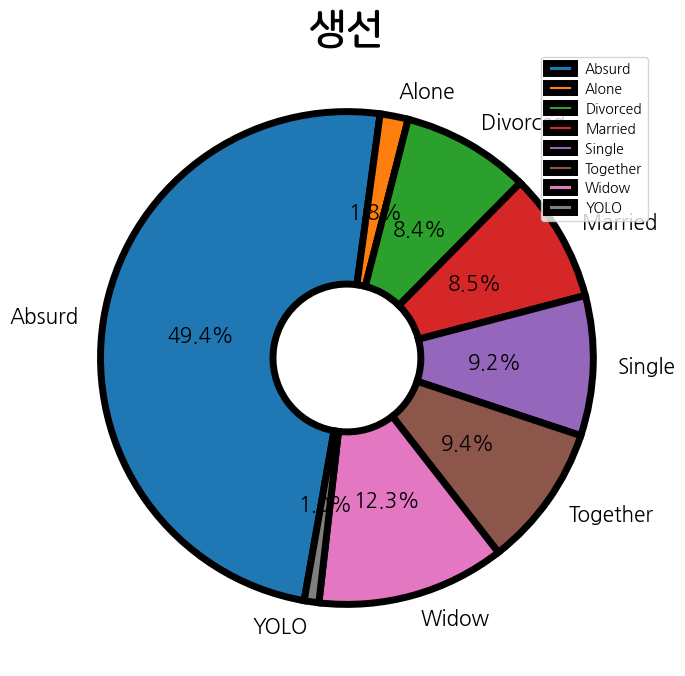

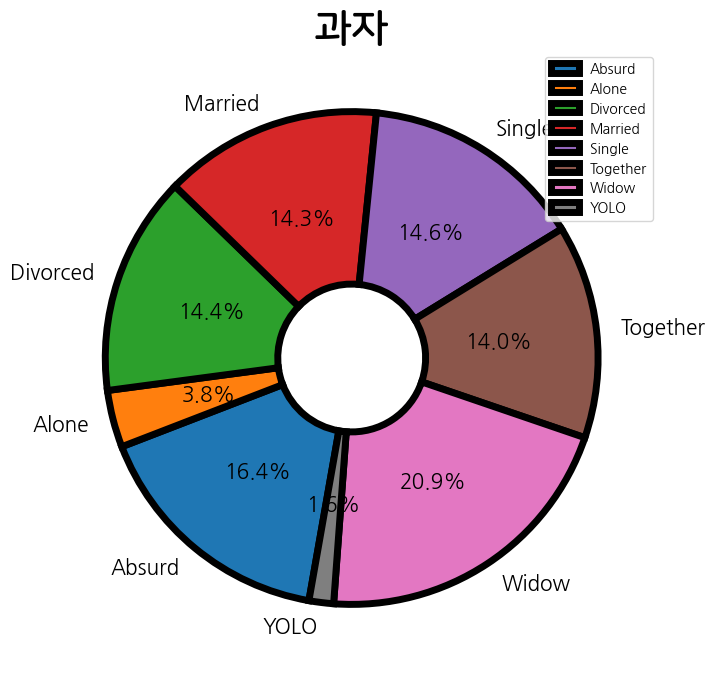

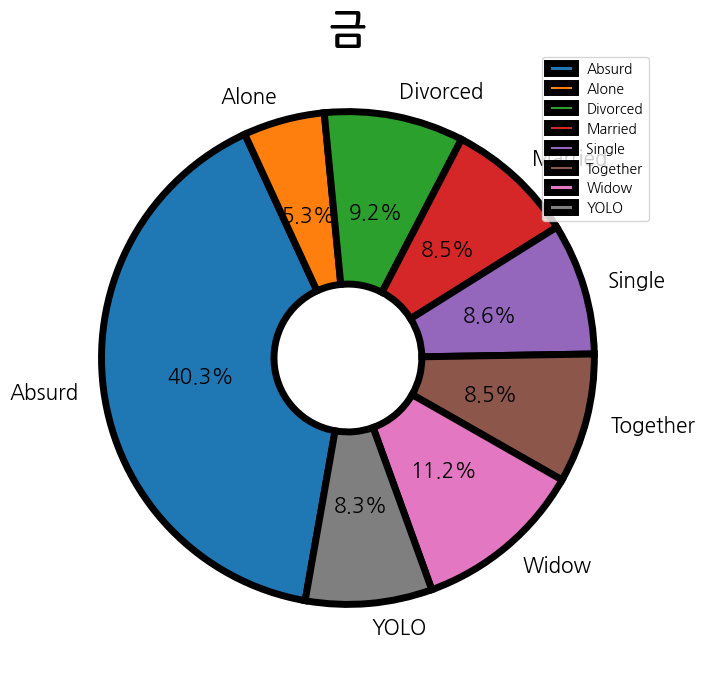

In [8]:
# 각 지출 음식, 금에 따른 결혼 상태 수 차트 그림

Label = ["와인","과일","고기","생선","과자","금"]
path = os.getcwd()
nanum_path = os.path.join(path,"NanumSquareRoundB.ttf")
fontprop = fm.FontProperties(fname=nanum_path)
for i,j in enumerate(Marital_Status_df.columns[:-1]):
    plt.figure(figsize=(8,8))
    plt.pie(Marital_Status_df.loc[:,j],labels=Marital_Status_df.index, autopct='%.1f%%', startangle=260, counterclock=False
           , wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 5},textprops={'size':15})
    plt.title(Label[i],size=30,fontproperties=fontprop)
    plt.legend()
    plt.show()


In [9]:
# 결론
# -> 1. 결혼상태에 따라 Alone의 경우 매우 낮은 소비량을 보였다.
# -> 2. Yolo는 와인과 금에 대한 소비가 다른 소비보다 월등히 높다.
# -> 3. 고기, 생선, 과일, 금의 경우 Absurd 유형이 가장 많이 산다는 것을 알 수 있다.
# -> 4. 결론적으로 고기, 생선을 사는 사람들은 Absurd, Yolo, Alone을 제외한 나머지는 비슷한 금액을 지출하며 산다.
# ->     상대적으로 Absurd는 큰 지출을, Yolo, Alone는 적은 지출을 하는 모습을 보인다.

In [10]:
# 하지만 다른 관점에서 바라보자 .
# 아까는 안 산 사람도 포함하여 평균을 내었지만, 이번에는 산 사람의 수를 특정해보자.
Count = pd.DataFrame()

Money_List = {"MntWines":"Wine","MntFruits":"Fruit","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweet","MntGoldProds":"Gold"}
for i in main_df["Marital_Status"].unique():
    for j in Money_List:
        Count.loc[i,Money_List[j]] =  main_df[(main_df["Marital_Status"]==i) & (main_df[j]!=0)].shape[0]

In [11]:
# -> 5. 이렇게 YOLO와 Absurd는 거의 안산다는 것을 알 수 있다.
# -> 6. 다시 말해서 Absurd 유형은 한 번 살 때 대량으로 산다는 것을 알 수 있다.
# -> 7. 음식은 Married, Together, single ,Divorced순으로 많이 산다는 것을 알 수 있다. 
Count

,Wine,Fruit,Meat,Fish,Sweet,Gold
Single,477.0,408.0,480.0,398.0,394.0,469.0
Together,579.0,467.0,580.0,476.0,471.0,559.0
Married,858.0,703.0,864.0,714.0,699.0,841.0
Divorced,229.0,196.0,231.0,198.0,193.0,227.0
Widow,77.0,60.0,77.0,64.0,58.0,76.0
Alone,3.0,2.0,3.0,2.0,3.0,3.0
Absurd,2.0,2.0,2.0,2.0,1.0,2.0
YOLO,2.0,2.0,2.0,2.0,2.0,2.0
